Academia Model Fitness -  interação com o cliente baseados em dados analíticos

1. Dados

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

In [118]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [119]:
df.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [121]:
df.columns = df.columns.str.lower()

In [122]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

2. AED

2.1 Verificar valores ausentes e estatísticas básicas

In [123]:
df.describe() # Estatísticas descritivas

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [124]:
df.mean()

gender                                 0.510250
near_location                          0.845250
partner                                0.486750
promo_friends                          0.308500
phone                                  0.903500
contract_period                        4.681250
group_visits                           0.412250
age                                   29.184250
avg_additional_charges_total         146.943728
month_to_end_contract                  4.322750
lifetime                               3.724750
avg_class_frequency_total              1.879020
avg_class_frequency_current_month      1.767052
churn                                  0.265250
dtype: float64

In [125]:
# Verificar valores ausentes
print(df.isnull().sum())

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


2.2 Comparar características entre clientes

In [126]:
# Agrupar por rotatividade
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


2.3 Visualizações

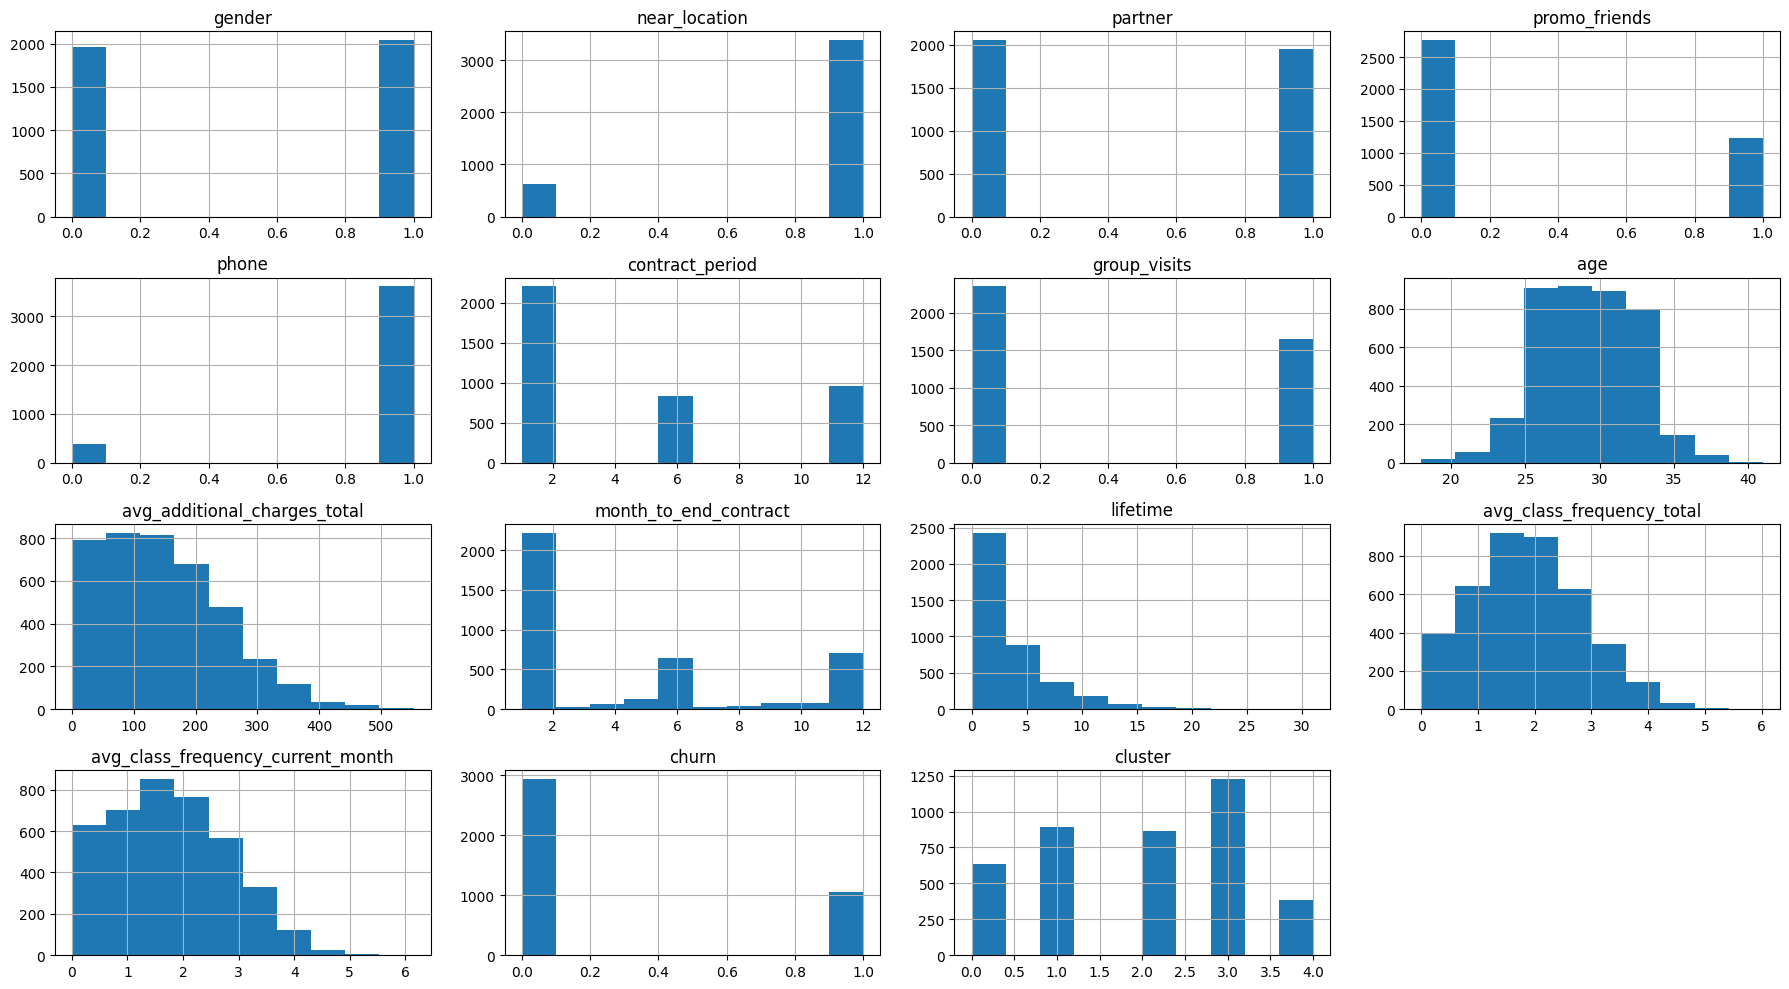

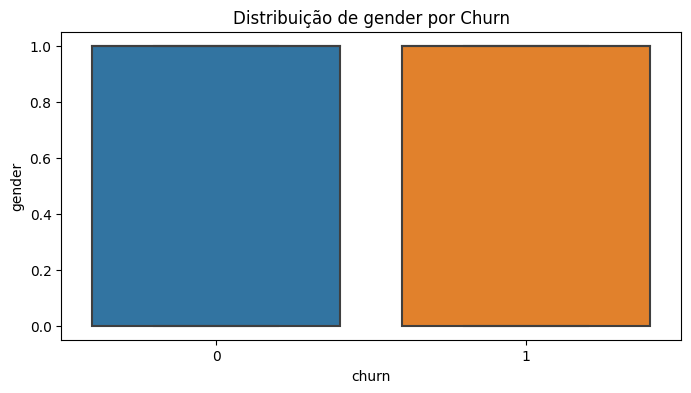

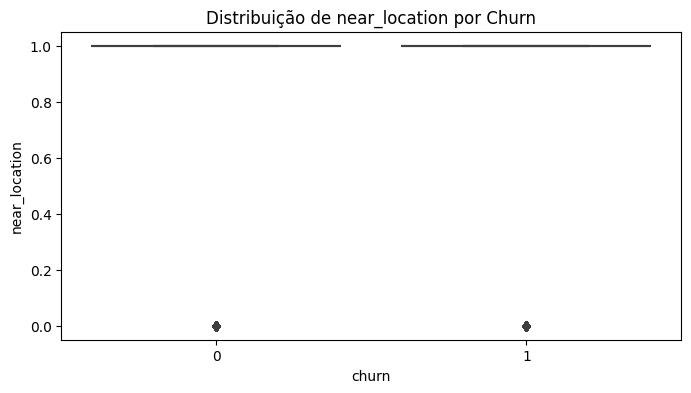

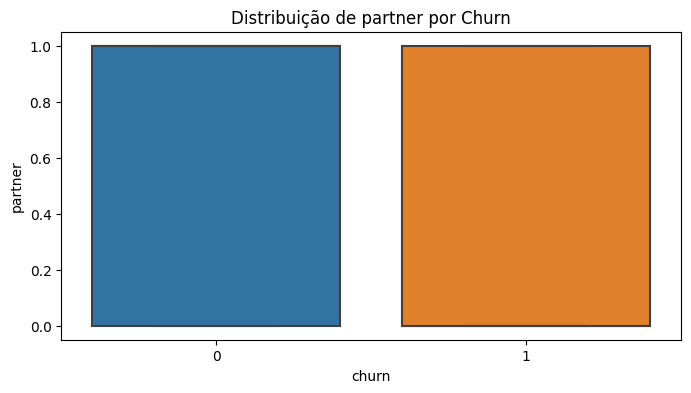

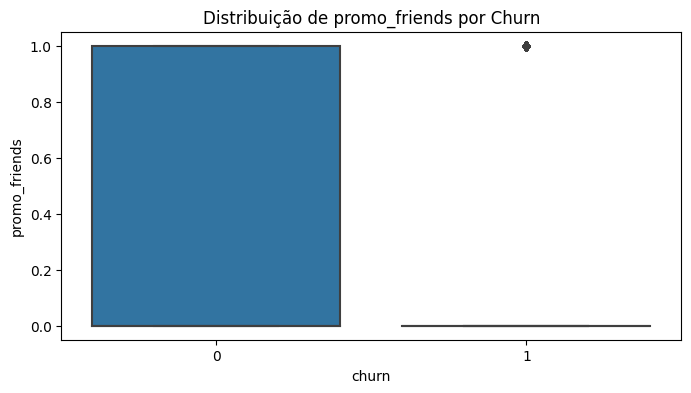

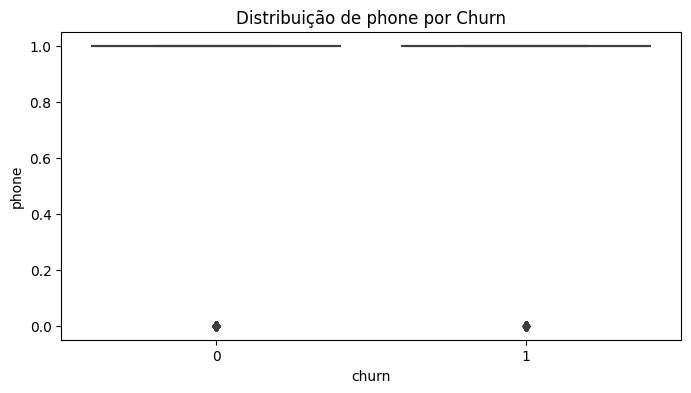

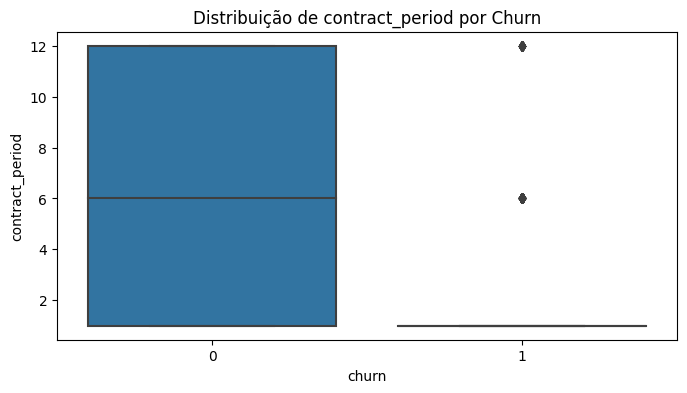

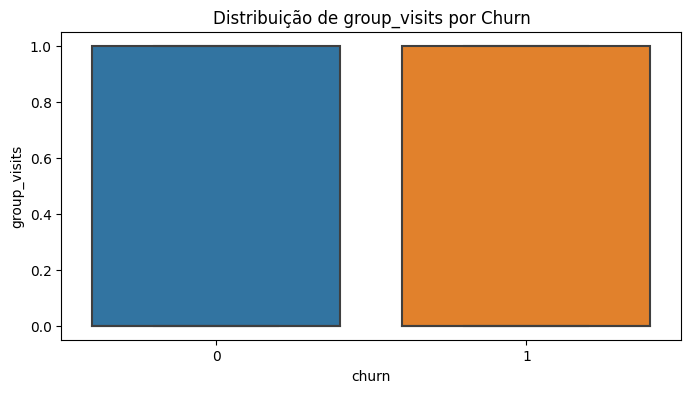

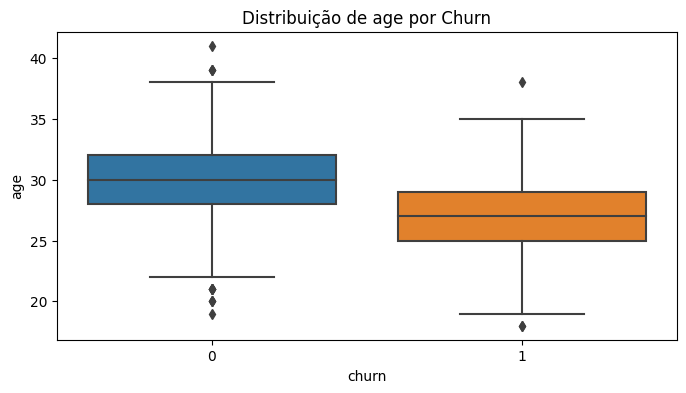

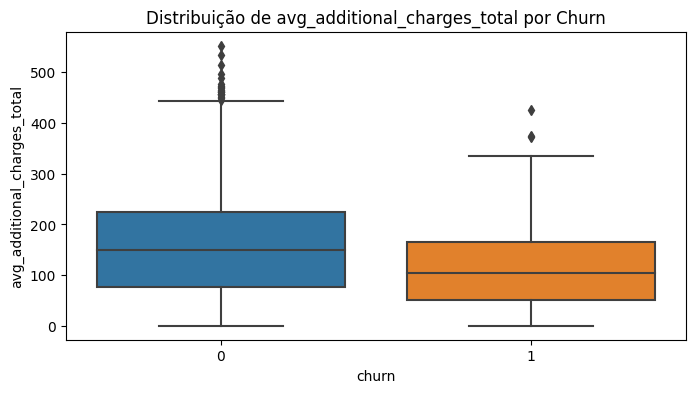

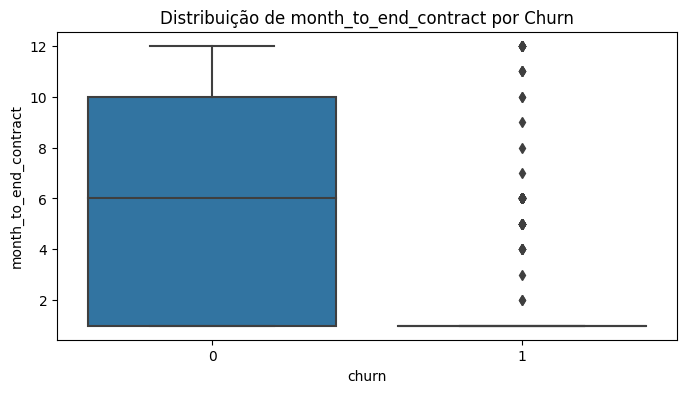

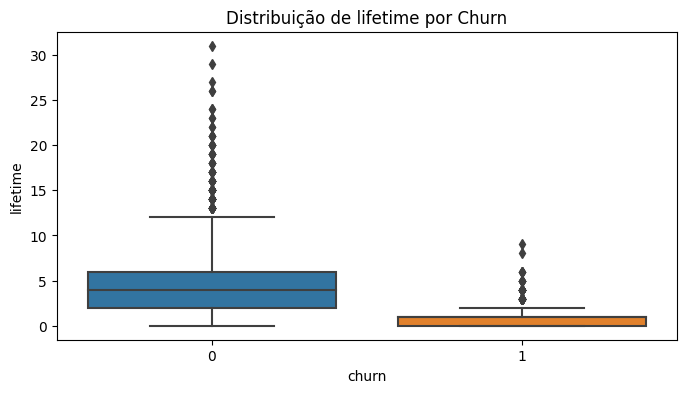

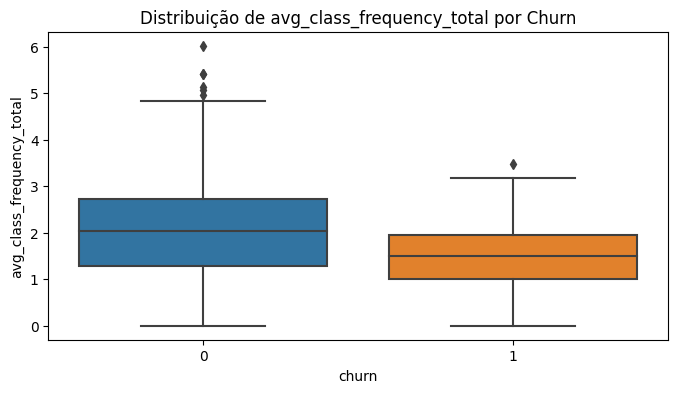

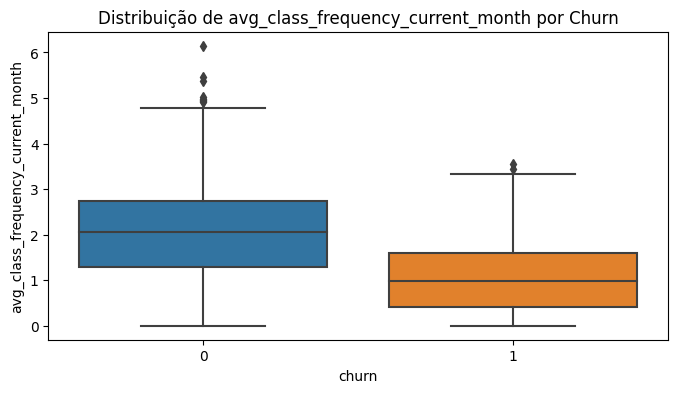

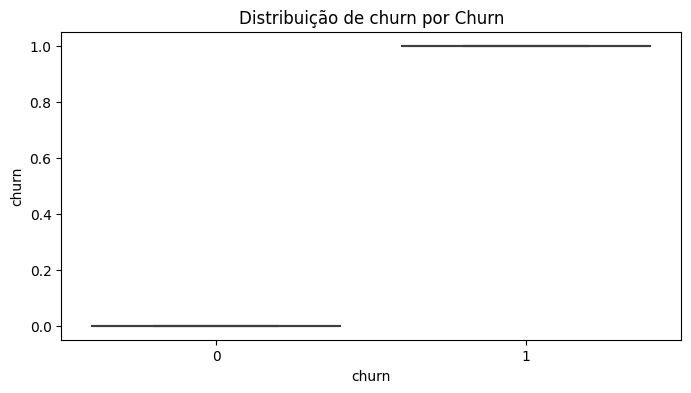

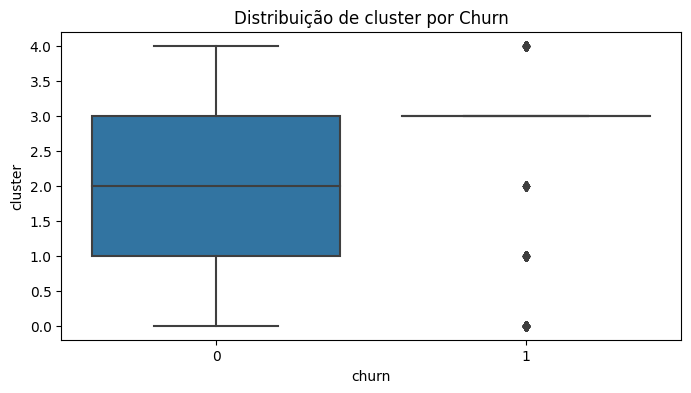

In [141]:
# Histogramas para variáveis numéricas
df.hist(figsize=(18, 10))
plt.tight_layout()
plt.show()

# Boxplots por 'Churn'
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='churn', y=column)
    plt.title(f'Distribuição de {column} por Churn')
    plt.show()

2.4 Matriz de Correlação

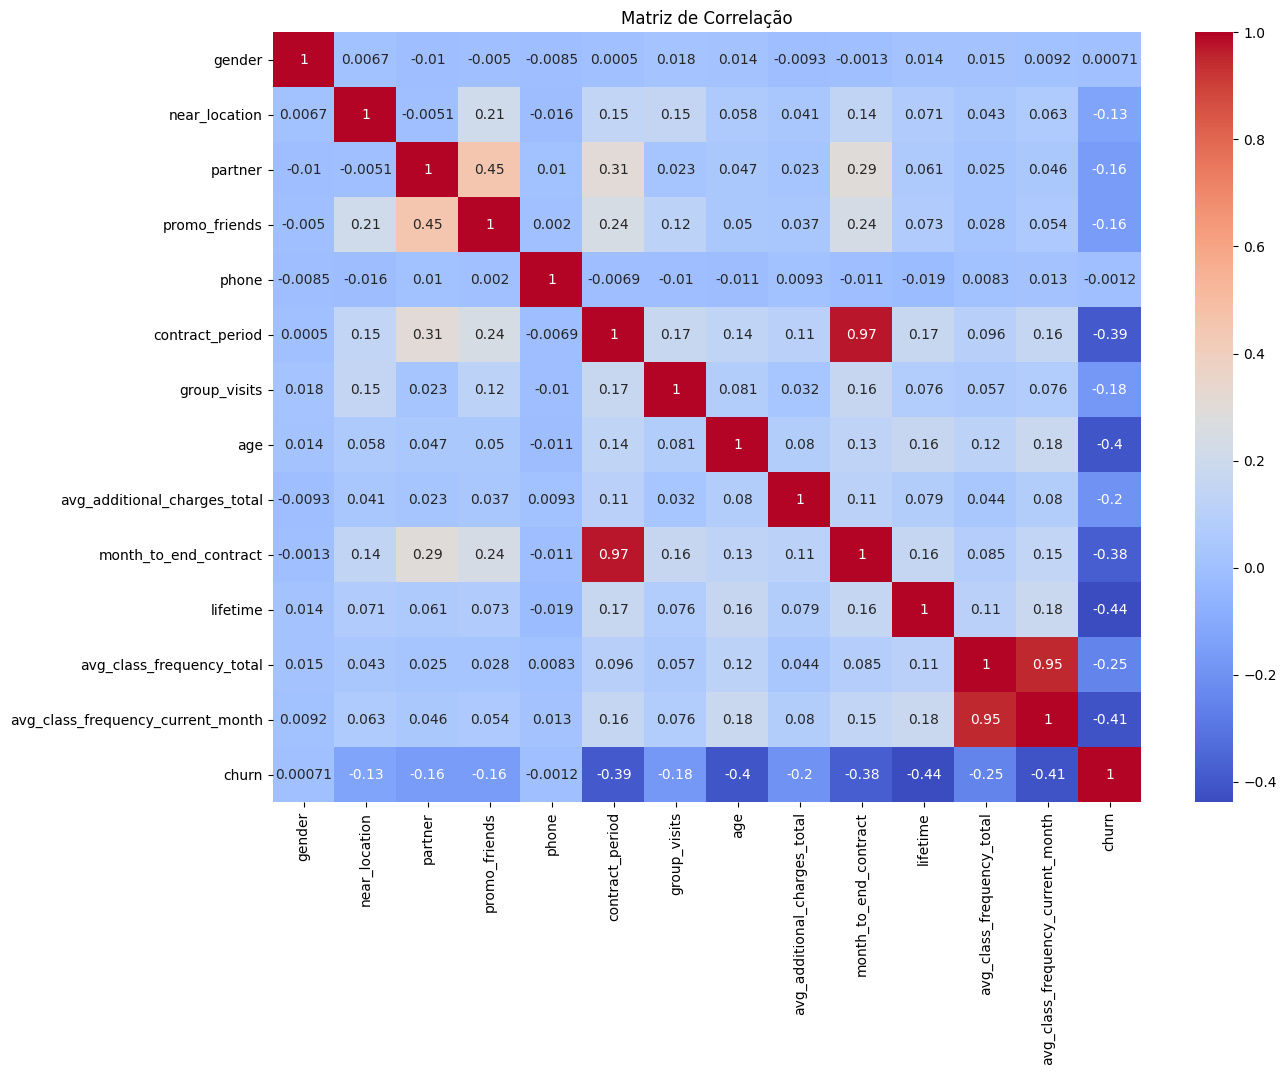

In [128]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

3. Modelo Predizendo Rotatividade de Clientes

Construa um modelo de classificação binária para clientes onde a variável objetivo é a saída de usuários do próximo mês

3.1 Pré-processamento e divisão dos dados

In [129]:
X = df.drop(columns='churn')
y = df['churn']

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Dividir treino e teste
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

3.2 Treinar modelos

In [130]:
# Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_valid)
print("Regressão Logística:")
print(classification_report(y_valid, y_pred_log))

Regressão Logística:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       747
           1       0.88      0.81      0.85       253

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.92      0.93      0.92      1000



In [131]:
# Floresta Aleatória
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_valid)
print("Floresta Aleatória:")
print(classification_report(y_valid, y_pred_rf))

Floresta Aleatória:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       747
           1       0.87      0.79      0.83       253

    accuracy                           0.92      1000
   macro avg       0.90      0.87      0.89      1000
weighted avg       0.91      0.92      0.91      1000



4. Agrupamento de Clientes

4.1 Padronizando os dados (sem a coluna 'churn')

In [134]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Selecionar colunas para clustering
cluster_data = df.drop(columns='churn')
cluster_data = pd.get_dummies(cluster_data, drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

4.2 Dendrograma para estimar número de clusters

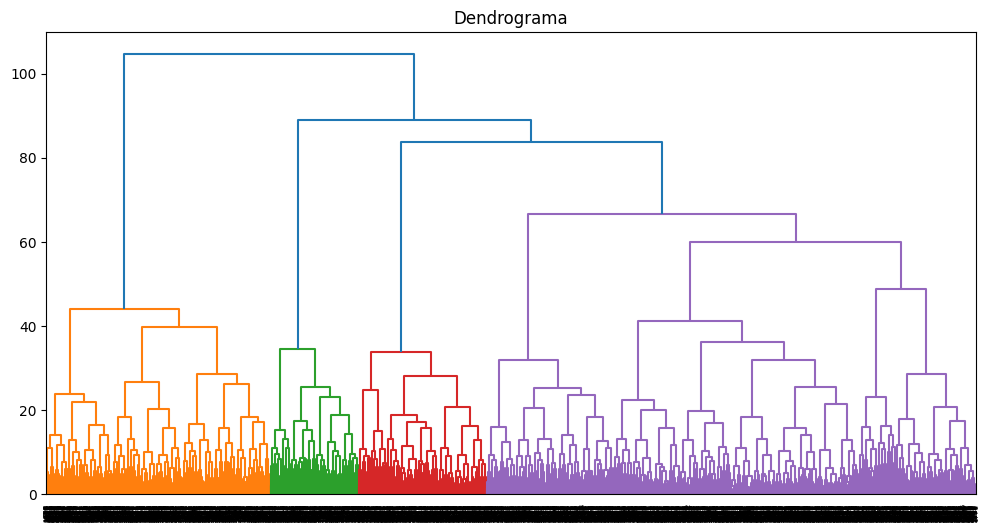

In [135]:
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Dendrograma')
plt.show()

4.3 K-means com 5 clusters

In [136]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

4.4 Análise dos clusters

In [137]:
# Médias por cluster
cluster_means = df.groupby('cluster').mean()

# Rotatividade por cluster
churn_rates = df.groupby('cluster')['churn'].mean()

print("Médias por Cluster:")
print(cluster_means)

print("Taxas de Rotatividade por Cluster:")
print(churn_rates)

Médias por Cluster:
           gender  near_location   partner  promo_friends  phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                                  

4.5 Visualizações por Cluster

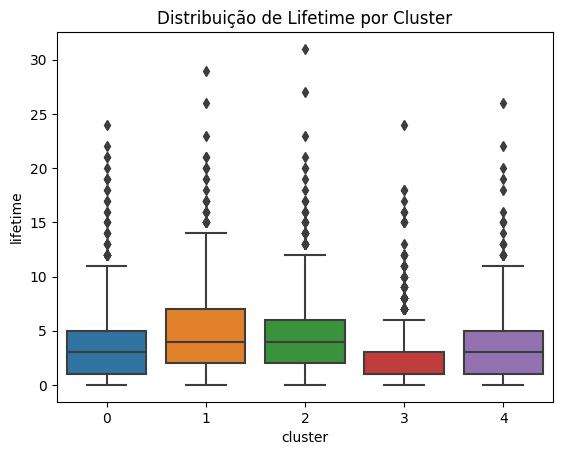

In [138]:
# Exemplo: Lifetime por cluster
sns.boxplot(data=df, x='cluster', y='lifetime')
plt.title("Distribuição de Lifetime por Cluster")
plt.show()

5. Conclusoes e Recomedações

Conclusões Baseadas em Análise:
Frequência de Visitas é o fator mais importante. 
Clientes que visitam mais vezes têm menor probabilidade de sair.
Tempo de contrato mais longo (6 meses ou 1 ano) se correlaciona com menor rotatividade.
Clientes de empresas parceiras e com promoções de amigos têm maior retenção.
Clientes que participam de aulas em grupo são mais leais.

Recomendações de Retenção
1. Criar um Programa de Engajamento:
Incentivar visitas regulares com recompensas (pontos, brindes).
Alertas automáticos se o cliente faltar 2 semanas.

2. Estender os Contratos com Benefícios:
Descontos ou bônus para migração de planos mensais para trimestrais/semestrais.

3. Fortalecer Parcerias:
Expandir acordos com empresas para incluir mais funcionários em programas de fidelidade.

4. Investir em Aulas em Grupo e Comunidade:
Aumentar a oferta de aulas coletivas (yoga, HIIT, jump, pump, etc).

Promover eventos e desafios comunitários mensais para fortalecer o senso de pertencimento e uniao.